In [17]:
from pathlib import Path
import os

import qdrant_client
from llama_index.core import (
    VectorStoreIndex,
    StorageContext
)
from llama_index.llms.ollama import Ollama
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings

from llama_index.readers.obsidian import ObsidianReader
from llama_index.core.readers.base import BaseReader
from llama_index.readers.file.markdown import MarkdownReader

from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [2]:
# from langchain_community.document_loaders import ObsidianLoader
# loader = ObsidianLoader("/Users/cairo/Library/Mobile Documents/iCloud~md~obsidian/Documents")
# docs = loader.load()
# print(docs[4].page_content[0:200])

In [14]:
class MyObsidianReader(BaseReader):
    """Utilities for loading data from an Obsidian Vault.

    Args:
        input_dir (str): Path to the vault.

    """

    def __init__(self, input_dir: str):
        """Init params."""
        self.input_dir = Path(input_dir)

    def my_load_data(self, *args, **load_kwargs):
        """Load data from the input directory."""
        docs = []
        for dirpath, dirnames, filenames in os.walk(self.input_dir):
            # Exclude 'image_media' from directory traversal
            if "Images_Media" in dirnames:
                dirnames.remove("Images_Media")
            dirnames[:] = [d for d in dirnames if not d.startswith(".")]
            for filename in filenames:
                if filename.endswith(".md"):
                    filepath = os.path.join(dirpath, filename)
                    content = MarkdownReader().load_data(Path(filepath))
                    docs.extend(content)
        return docs

    def load_langchain_documents(self, **load_kwargs):
        """Load data in LangChain document format."""
        docs = self.load_data(**load_kwargs)
        return [d.to_langchain_format() for d in docs]

In [19]:
# Initialize ObsidianReader with the path to the Obsidian vault
reader = MyObsidianReader(input_dir="/Users/cairo/Library/Mobile Documents/iCloud~md~obsidian/Documents")

# Load data from the Obsidian vault
documents1 = reader.my_load_data()

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
documents1_clean = []
for doc in documents1:
    if doc.text == '':
        continue
    else:
        documents1_clean.append(doc)
documents1_clean

[Document(id_='ae4ef000-56c8-4d53-8312-bfa6717f144c', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='\n\n', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='6fd348ac-515e-4635-bc0c-8497cef8d7bb', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='\n\n海带黄豆排骨汤\n\n海带除了出名的利尿消肿、补充碘元素、抗辐射，还能补脑 ~ 而且日本人说的味素（也就是味精）之所以能够被发明也是因为海带！为啥？因为鲜啊！而且价钱便宜，是我们普通人家日常都能经常喝的美味~\n', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='99c06f2d-037e-4558-b6dd-cf163e0a64cf', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='\n\n食材：\n\n猪骨大概1磅，海带干一大片，黄豆1把，姜一块\n', start_char_idx=None, end_char_idx=N

In [9]:
documents1_clean[500]

Document(id_='0ff7fe14-1944-4d74-b6af-e1eeebaf4be3', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='\n\n**我的business sense 有多好**：\n\nmy mentor says she has a project relevant to marketing. that I find the three promising suggestions that she had worked for more than a month\n\nHow to be different from forbidden city; where to find the breakthrough point\n\nFrom category view: mature category, use design to be unique; niche category, which criteria to have to select category; from consumer view;\n', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')

In [10]:
documents1_clean[500].text

'\n\n**我的business sense 有多好**：\n\nmy mentor says she has a project relevant to marketing. that I find the three promising suggestions that she had worked for more than a month\n\nHow to be different from forbidden city; where to find the breakthrough point\n\nFrom category view: mature category, use design to be unique; niche category, which criteria to have to select category; from consumer view;\n'

In [11]:
documents1_clean[501].text

'\n\nmentorship you’ve given and received\n\n**given**: research assistants and lower grade phd students;\n\nsituation: they work for me as volunteer; no pay\n\ntask: make them feel rewarding and learn sth; its my responsibility\n\naction: 1. diverse task: try not put repetitive work to the same person; give my best guidance 2. they want to learn data analysis; organized workshop; organized slack channel, and answer Qs on the channel every few days; 3. I also helped them with grad school application etc.\n\nresult: they learned how to use R because they work for me; they refer their friends to work as my RA; very good relationship; ; we were still in contact; one Indian student become a data science guy after graduation; she said she was so afraid of math and coding before the workshop;\n\nmy professor is still using my slides and video to train his student in R\n\n**received: CTO and other colleagues;** \n\nsituation: tech stack and infrastructure; git pull request\n\ntask: learn abou

In [12]:
documents1_clean[502].text

'\n\n****What\'s your favorite product and why?****\n\n"What do you mean by favorite product? Are you thinking specifically hardware, software, or a feature within those, or something non-electronic?\xa0**Dealer\'s Choice.**\n\n"Are you asking why I love this product, or to explain why this product is a market leader independent of how i feel about it?\xa0**Talk about why YOU love this product**.\n'

In [13]:
longest_doc = 0
longest_index = 0
long_docs = []
for index, item in enumerate(documents1_clean):
    if len(item.text) > longest_doc:
        longest_doc = len(item.text)
        longest_index = index

print(longest_doc, longest_index)





38991 1167


In [ ]:
long_docs = []
for index, item in enumerate(documents1_clean):
    if len(item.text) > 10000:
        long_docs.append(item)

In [16]:
long_docs = [doc for doc in documents1_clean if len(doc.text)>10000]
long_docs

[Document(id_='0d11cb32-05c0-4f1e-bee5-ce3e31c83c37', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='\n\n**Experiment Design**\n\n- What do you mean by A/B testing?\n    - https://dimensionless.in/data-science-interview-questions-with-answers/\n    - As well as being perhaps the most accurate tool for estimating effect size (and therefore ROI), it is also able to provide us with causality, a very elusive thing in data science! With causality we can finally lay to rest the “correlation vs causation” argument, and prove that our new product actually works.\n    - https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a\n    - Type I error\u200a—\u200aor falsely concluding that your intervention was successful (which here might be falsely concluding that layout B is better than Layout A). Also known as a false positive result.\n    - Type II error\u200a—\u200afalsely concluding that your int

In [17]:
long_docs[0].text

'\n\n**Experiment Design**\n\n- What do you mean by A/B testing?\n    - https://dimensionless.in/data-science-interview-questions-with-answers/\n    - As well as being perhaps the most accurate tool for estimating effect size (and therefore ROI), it is also able to provide us with causality, a very elusive thing in data science! With causality we can finally lay to rest the “correlation vs causation” argument, and prove that our new product actually works.\n    - https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a\n    - Type I error\u200a—\u200aor falsely concluding that your intervention was successful (which here might be falsely concluding that layout B is better than Layout A). Also known as a false positive result.\n    - Type II error\u200a—\u200afalsely concluding that your intervention was not successful. Also known as a false negative result.\n    - http://www.cs.cornell.edu/courses/cs578/2006fa/design.html\n    - https://www.analyticsvidhya.

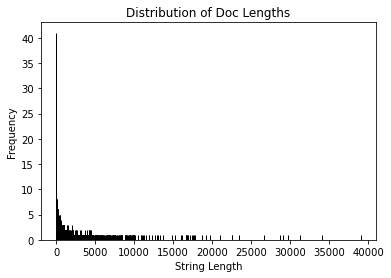

In [15]:
import matplotlib.pyplot as plt

lengths = [len(doc_element.text) for doc_element in documents1_clean]
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), edgecolor='black')
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.title("Distribution of Doc Lengths")
plt.show()


In [14]:
documents1_clean[1167].text

'\n\nDrawing\n```json\n{\n\t"type": "excalidraw",\n\t"version": 2,\n\t"source": "https://github.com/zsviczian/obsidian-excalidraw-plugin/releases/tag/1.9.9",\n\t"elements": [\n\t\t{\n\t\t\t"type": "freedraw",\n\t\t\t"version": 36,\n\t\t\t"versionNonce": 67521280,\n\t\t\t"isDeleted": false,\n\t\t\t"id": "n5qri4pZQTumqhSLwVflx",\n\t\t\t"fillStyle": "hachure",\n\t\t\t"strokeWidth": 1,\n\t\t\t"strokeStyle": "solid",\n\t\t\t"roughness": 1,\n\t\t\t"opacity": 100,\n\t\t\t"angle": 0,\n\t\t\t"x": -215.12890625,\n\t\t\t"y": -162.390625,\n\t\t\t"strokeColor": "#1e1e1e",\n\t\t\t"backgroundColor": "transparent",\n\t\t\t"width": 194.9375,\n\t\t\t"height": 78.2109375,\n\t\t\t"seed": 2001151232,\n\t\t\t"groupIds": [],\n\t\t\t"frameId": null,\n\t\t\t"roundness": null,\n\t\t\t"boundElements": [],\n\t\t\t"updated": 1690073550610,\n\t\t\t"link": null,\n\t\t\t"locked": false,\n\t\t\t"points": [\n\t\t\t\t[\n\t\t\t\t\t0,\n\t\t\t\t\t0\n\t\t\t\t],\n\t\t\t\t[\n\t\t\t\t\t0.2421875,\n\t\t\t\t\t-0.4921875\n\t\t\t\

In [6]:
# tt = [documents1[600], documents1[300]]
# myindex = VectorStoreIndex.from_documents(tt, embed_model=Settings.embed_model)

In [7]:
index_alldoc = VectorStoreIndex.from_documents(documents1_clean, embed_model=Settings.embed_model)

In [8]:
# initialize the vector store
# client = qdrant_client.QdrantClient(
#     path="./qdrant_data"
# )
vector_store = QdrantVectorStore(client=client, collection_name="tweets")
storage_context = StorageContext.from_defaults(vector_store=vector_store)

llm = Ollama(model="Tinydolphin", request_timeout=120.0)

Settings.llm = llm
Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)
# Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)
# Settings.num_output = 512
# Settings.context_window = 3900

query_engine = index_alldoc.as_query_engine()
chat_engine = index_alldoc.as_chat_engine()
retriever = index_alldoc.as_retriever()

NameError: name 'client' is not defined

In [ ]:
response = query_engine.query("Summary of all context about social perception")
print(response)

 So, based on the given context and my understanding from the provided context information, I will provide a summary of all the relevant points related to social perception.

- The study of social perception is complex and has evolved over time. The traditional model of attraction based on actor, partner, and relationship effects has been replaced by theories that include actor, partner, and interactive effects.
- The presence of social perception theories has been documented in various studies. These theories have attempted to provide a general conceptual framework for the attraction process. Some of the key factors mentioned in these theories are personality, intelligence, and situational context.
- Kenny did not treat liking as the same as the personality judgement task. Instead, he referred to liking as an intrinsic attribute that cannot be changed or altered by external factors. He believed that people can do things differently but maintain their core personality traits.
- The pre

In [ ]:
response = chat_engine.chat("Nice Guys")
print(response)

 The Nice Guys is a comedy troupe that prides itself on making fun of the everyday foibles and stupidity of the human race. They perform in front of live audiences and have gained a dedicated following thanks to their unique blend of humor, wit, and relentless banter. Some people may know them from their popular sketch "The Creepy Crush" or their other comedy sketches on various social media platforms.


In [ ]:
ret1 = retriever.retrieve("Nice Guys")
print(ret1)

[NodeWithScore(node=TextNode(id_='680921c3-9cd9-4c27-ba74-a43eecbc19fa', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='87d41701-0b40-4ae8-9a71-2152d9d04ad4', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='df69577a5282086dcc2f4be280fd6f81b223c12f8071e9a2683d6006b5658730'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='80839621-2b32-4f4c-a8c3-78dceb7af4a7', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='5c2adc3688d64bdef72312a35c3db18c777aa7f4495e23744b2727c6e569f3a5')}, text="杂 86 nice guy\n\n**Being integrated means being able to accept all aspects of one's self.** An integrated man is able to\nembrace everything that makes him uniquely male: his power, his assertiveness, his courage, and his\npassion as well as his imperfections, his mistakes, and his dark side.\n\nAn integrated male possesses many of the following attributes:\n\n- ●\xa0**He h